<a href="https://colab.research.google.com/github/undanielrojo/Trabajos_salle/blob/main/Proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Proyecto 2, machine learning*

Santiago Yate - Daniel Carranza

In [ ]:
!pip install wooldridge pingouin missingno

import wooldridge as wd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as st
import pingouin as pg

import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer, MissingIndicator
from scipy.spatial.distance import mahalanobis

Importacion de la DATA


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_2.csv')

In [ ]:
dataset

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

Limpieza de data 

In [ ]:
dataset.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1','Avg_Open_To_Buy','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal'],inplace = True)

In [ ]:
dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,3313.0,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,4003.0,15476,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,4277.0,8764,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,5409.0,10291,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,5281.0,8395,62


Impotacion de la data completa

In [ ]:
dataset.duplicated().sum()

In [ ]:
dataset.info

In [ ]:
dataset.isna().sum()


Verifique si la diferencia de proporciones para las siguientes variables es estadísticamente significativa:
Attrition Flag

In [ ]:
dataset['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

<AxesSubplot:>

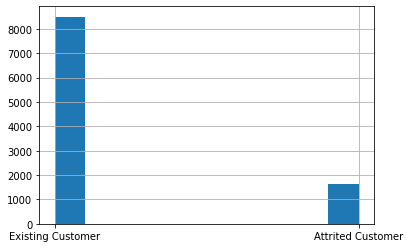

In [ ]:
dataset['Attrition_Flag'].hist()

Proporciones de Attrition flag en un histograma

Verifique si la diferencia de proporciones para las siguientes variables es estadísticamente significativa:Gender

In [ ]:
dataset['Gender'].value_counts(normalize=True)

F    0.529081
M    0.470919
Name: Gender, dtype: float64

<AxesSubplot:>

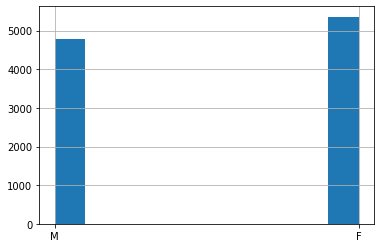

In [ ]:
dataset['Gender'].hist()

Proporciiones de Gender en un histograma


In [ ]:
import scipy.stats as stats

In [ ]:
tabla_contingencia = pd.crosstab(dataset['Attrition_Flag'], dataset['Gender'])

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)
nivel_significancia = 0.05

if p < nivel_significancia:
    print('La diferencia de proporciones es estadísticamente significativa.')
else:
    print('La diferencia de proporciones no es estadísticamente significativa.')

La diferencia de proporciones es estadísticamente significativa.


Verifique si las siguientes variables siguen una distribución normal: Customer Age

In [ ]:
dataset['Customer_Age'].value_counts()

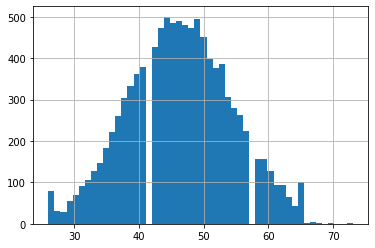

In [ ]:
CustomerA_hist = dataset['Customer_Age'].hist(bins=50)

Grafico donde describe la distribucion de la edad

<AxesSubplot:>

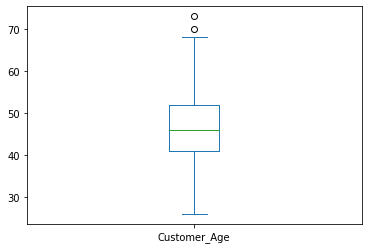

In [ ]:
dataset['Customer_Age'].plot(kind='box')

In [ ]:
stats.probplot(dataset, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")
plt.show()

TypeError: ignored

Verifique si las siguientes variables siguen una distribución normal:
Dependent Count

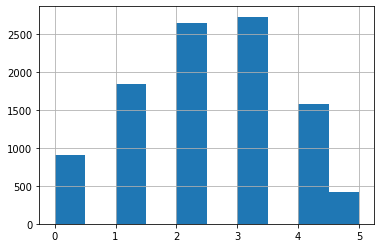

In [ ]:
Dependent_count_hist = dataset['Dependent_count'].hist()

Distribucion de la variable Dependent count en un histograma

<AxesSubplot:>

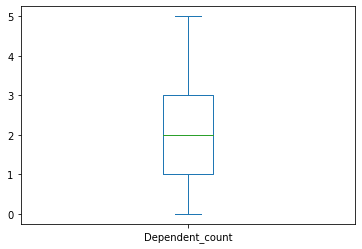

In [ ]:
dataset['Dependent_count'].plot(kind='box')

Divida el dataset en dos grupos a partir de la variable Attrition Flag. Verifique si hay diferencias en la media o en la mediana significativas en cuanto a Customer Age y en cuanto a Dependent Count para los dos grupos.

In [ ]:
grupos = dataset.groupby('Attrition_Flag')

In [ ]:
media_por_grupo = grupos['Customer_Age'].mean()
media_por_grupo

Attrition_Flag
Attrited Customer    46.659496
Existing Customer    46.262118
Name: Customer_Age, dtype: float64

In [ ]:
mediana_por_grupo = grupos['Customer_Age'].median()
mediana_por_grupo

Attrition_Flag
Attrited Customer    47.0
Existing Customer    46.0
Name: Customer_Age, dtype: float64

In [ ]:
media_por_grupo1 = grupos['Dependent_count'].mean()
media_por_grupo1

Attrition_Flag
Attrited Customer    2.402581
Existing Customer    2.335412
Name: Dependent_count, dtype: float64

In [ ]:
mediana_por_grupo1 = grupos['Dependent_count'].median()
mediana_por_grupo1

Attrition_Flag
Attrited Customer    2.0
Existing Customer    2.0
Name: Dependent_count, dtype: float64

Construya cinco tablas de contingencia que relacionen por separado la variable Attrition Flag con



*   Gender
*   Education Level
*   Marital Status
*   Income Category
*   Card Category




In [ ]:
tabla_1 = pd.crosstab(dataset['Attrition_Flag'], dataset['Gender'])
tabla_1

Gender,F,M
Attrition_Flag,,
Attrited Customer,930,697
Existing Customer,4428,4072


Las mujeres son mas usuarios del banco, donde la tasa de desercion es superior que los hombres.

In [ ]:
tabla_2 = pd.crosstab(dataset['Attrition_Flag'], dataset['Education_Level'])
tabla_2

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Attrition_Flag,,,,,,,
Attrited Customer,154,95,487,306,92,237,256
Existing Customer,859,356,2641,1707,424,1250,1263


la rotacion de clientes o attrited customer es inferior que existing customer,  donde los doctorados son los que menos frecuentan ser attrited customer o existing customer, sin embargo gratuate es la que mas participacion maneja en attrited y existing customer

In [ ]:
tabla_3 = pd.crosstab(dataset['Attrition_Flag'], dataset['Marital_Status'])
tabla_3

Marital_Status,Divorced,Married,Single,Unknown
Attrition_Flag,,,,
Attrited Customer,121,709,668,129
Existing Customer,627,3978,3275,620


Las personas casadas tienen mas relacion con los servicios bancarios, mientras que los divorciados son los que menos relacion tienen.

In [ ]:
tabla_4 = pd.crosstab(dataset['Attrition_Flag'], dataset['Income_Category'])
tabla_4

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Attrition_Flag,,,,,,
Attrited Customer,126,271,189,242,612,187
Existing Customer,601,1519,1213,1293,2949,925


la perdida de clientes es mas alta para personas con ingresos inferiores a los 40000, la mas baja es para las personas con ingresos superiores a los 120000.

In [ ]:
tabla_5 = pd.crosstab(dataset['Attrition_Flag'], dataset['Card_Category'])
tabla_5

Card_Category,Blue,Gold,Platinum,Silver
Attrition_Flag,,,,
Attrited Customer,1519,21,5,82
Existing Customer,7917,95,15,473


los clientes blue son los que tienen mayor relacion con el banco, los clientes platinum son los menos participes.

Lleve a cabo, para cada tabla, una prueba x^2



---




In [ ]:
tabla_1**2

Card_Category,Blue,Gold,Platinum,Silver
Attrition_Flag,,,,
Attrited Customer,2307361,441,25,6724
Existing Customer,62678889,9025,225,223729


In [ ]:
tabla_2**2

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Attrition_Flag,,,,,,,
Attrited Customer,23716,9025,237169,93636,8464,56169,65536
Existing Customer,737881,126736,6974881,2913849,179776,1562500,1595169


In [ ]:
tabla_3**2

Marital_Status,Divorced,Married,Single,Unknown
Attrition_Flag,,,,
Attrited Customer,14641,502681,446224,16641
Existing Customer,393129,15824484,10725625,384400


In [ ]:
tabla_4**2

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Attrition_Flag,,,,,,
Attrited Customer,15876,73441,35721,58564,374544,34969
Existing Customer,361201,2307361,1471369,1671849,8696601,855625


In [ ]:
tabla_5**2

Card_Category,Blue,Gold,Platinum,Silver
Attrition_Flag,,,,
Attrited Customer,2307361,441,25,6724
Existing Customer,62678889,9025,225,223729


Los valores arrojados con la prueba X^2 dependen del valor de la prueba, en caso de que sea mayor al critico o menor, para interpretar si las variables estan asociadas.

La relacion entre la perdida de clientes y los clientes existentes ronda en una relacion promedio de 5 veces, es decir, 1 de cada 5 de los clientes fieles, nuevos o que habituan comprar los servicios dejan de hacerlo, al igual que las parejas acostumbran mas a hacer este tipo de compra de producto o servicio que las personas divorciadas o solteras, ya que al estar casadas podrian acudir a creditos mas grandes para adquirir estos bienes, de igual forma las personas que obtienen ingresos inferiores a los 40000 son las mas activas para esta entidad bancaria, sin embargo mientras es mayor el ingreso, menor usan este tipo de productos